In [20]:
%matplotlib inline
%load_ext rpy2.ipython

In [1]:
d = pd.read_excel('/tmp/tmrp.xls')
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60456 entries, 0 to 60455
Data columns (total 21 columns):
Requisition #                                                                    60456 non-null object
Recruiter                                                                        60456 non-null object
Position Title                                                                   60456 non-null object
Assessment Level                                                                 60374 non-null object
Candidate First Name                                                             60456 non-null object
Candidate Last Name                                                              60456 non-null object
Email                                                                            60099 non-null object
Date applied                                                                     60456 non-null datetime64[ns]
Current HR status                                          

In [23]:
d = d.rename(columns={'How did you hear about this opportunity?  Please select one of the following:': 'how'})
d = d.rename(columns={'Name of referring Team Member:': 'referrer'})

In [27]:
d['was_hired'] = ~d['Hired-Onboarding'].isnull()

In [28]:
d.columns

Index(['Requisition #', 'Recruiter', 'Position Title', 'Assessment Level',
       'Candidate First Name', 'Candidate Last Name', 'Email', 'Date applied',
       'Current HR status', 'Hired-Onboarding', 'how', 'referrer',
       'Referring Team Member Work Location:',
       'Referring Team Member Phone #:',
       'Referring Team Member Email Address:', 'Date Open',
       'Offer Accepted - R', 'Offer Accepted - C', 'Location', 'Division',
       'HR Region', 'was_hired'],
      dtype='object')

In [25]:
d['how'].value_counts()

A Team Member referred me    60456
dtype: int64

In [26]:
d[(d['referrer'] == 'Chris Pinkerton') & (~d['Hired-Onboarding'].isnull()) ]

,Requisition #,Recruiter,Position Title,Assessment Level,Candidate First Name,Candidate Last Name,Email,Date applied,Current HR status,Hired-Onboarding,...,referrer,Referring Team Member Work Location:,Referring Team Member Phone #:,Referring Team Member Email Address:,Date Open,Offer Accepted - R,Offer Accepted - C,Location,Division,HR Region
29063,46600BR,"Forrey, Sara",Overnight Produce Grocery Clerk,Level One Retail and RSC,Lee,Harris,NaN,2014-07-26,Hired-Onboarding,2014-08-08 00:00:00,...,Chris Pinkerton,Watertower,(440) 320-7477,NaN,2014-07-01,2014-07-26,NaN,Store #4086- Strongsville MD,RTL,HRREG202


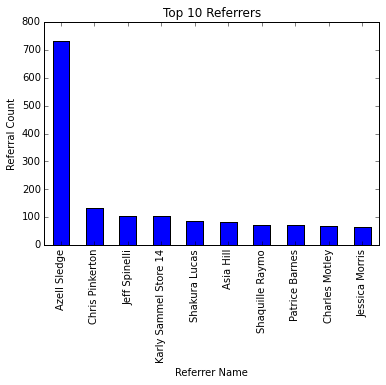

In [30]:
ax = d['referrer'].value_counts().drop('N/a').head(10).plot(kind='bar')
ax.set_title('Top 10 Referrers')
ax.set_xlabel('Referrer Name')
ax.set_ylabel('Referral Count')

In [37]:
d['referrer'].value_counts().drop('N/a').head(3000).sum()

30095

In [49]:
np.arange(10, 0, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [64]:
x = d['referrer'].value_counts().drop('N/a').reset_index()
x.columns = ['referrer', 'value']
x['id'] = np.arange(len(x), 0, -1)
import math
q = x.groupby(x['id'].apply(lambda z: math.ceil(10 * float(z)/len(x))))['value'].sum()
q = q.reset_index(name='total')
q

,id,total
0,1,1881
1,2,1881
2,3,1881
3,4,1881
4,5,3566
5,6,3762
6,7,5111
7,8,6689
8,9,9853
9,10,23765


In [72]:
q['bucket'] = q['id'].apply(lambda x: '{}-{}%'.format((x-1)*10, x*10))
q['cum_total'] = q['total'].cumsum()
q = q.sort('id', ascending=False)
q

,id,total,bucket,cum_total
9,10,23765,90-100%,60270
8,9,9853,80-90%,36505
7,8,6689,70-80%,26652
6,7,5111,60-70%,19963
5,6,3762,50-60%,14852
4,5,3566,40-50%,11090
3,4,1881,30-40%,7524
2,3,1881,20-30%,5643
1,2,1881,10-20%,3762
0,1,1881,0-10%,1881


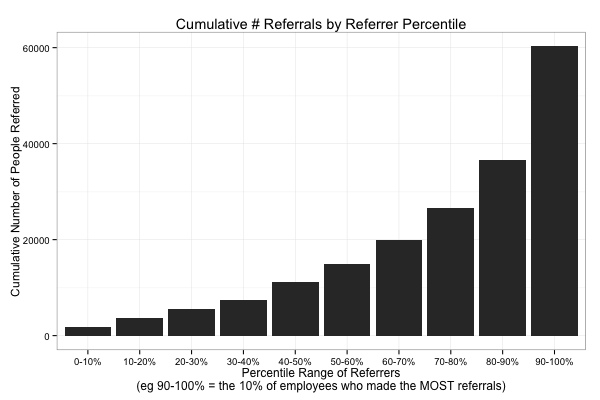

In [84]:
%%R -i q -w 600 -h 400 -u px
library(dplyr)
library(ggplot2)

q %>%
    mutate(cum_total=as.numeric(cum_total)) %>%
    ggplot(aes(x=bucket, y=cum_total)) + geom_bar(stat='identity') +
    theme_bw() + ggtitle('Cumulative # Referrals by Referrer Percentile') + 
    xlab('Percentile Range of Referrers\n(eg 90-100% = the 10% of employees who made the MOST referrals)') + 
    ylab('Cumulative Number of People Referred')